# AIGC 5005 Final Project

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
tensorflow.random.set_seed(0)

from warnings import filterwarnings
filterwarnings('ignore')

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [5]:
df.duplicated().sum()

0

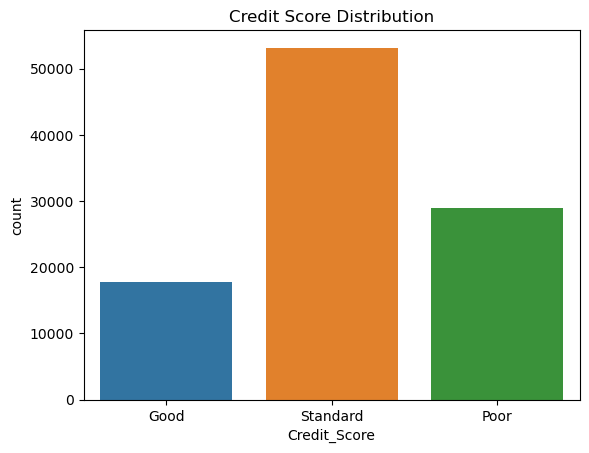

In [6]:
sns.countplot(df, x='Credit_Score', hue='Credit_Score')
plt.title('Credit Score Distribution')
plt.show()

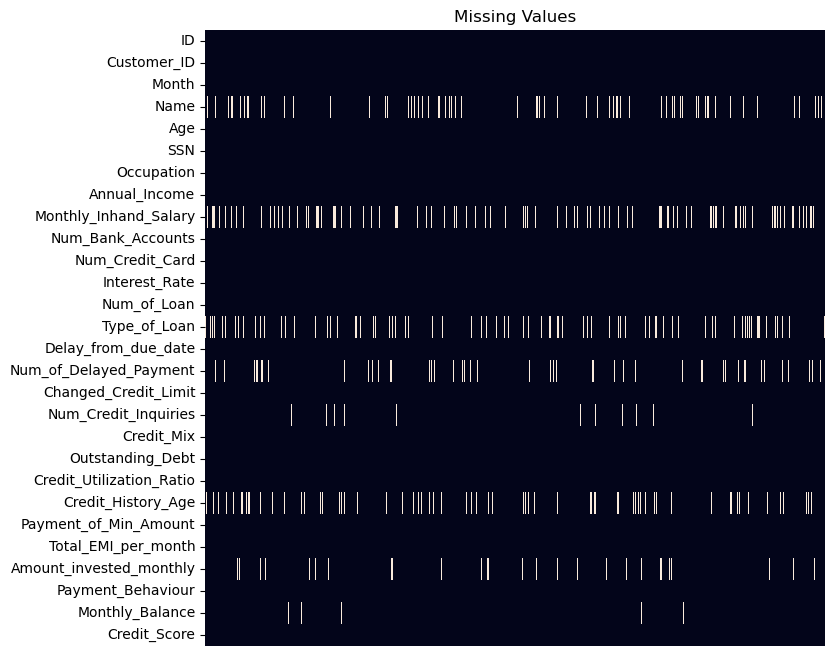

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull().T, cbar=False, xticklabels=False)
plt.title('Missing Values')
plt.show()

### Data Preprocessing

##### Drop Columns

In [8]:
df = df.drop(['ID','Customer_ID','Name','SSN'], axis=1)

##### Missing Values

In [9]:
df = df.drop(['Type_of_Loan','Credit_History_Age'], axis=1)

In [10]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

In [11]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: int(x.replace("_", "")) if type(x) == str else x)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x < 0 else x)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median(), downcast='int64')

In [12]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), downcast='int64')

In [13]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: np.nan if x == '__10000__' else float(x))
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

In [14]:
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x: np.nan if x == '__-333333333333333333333333333__' else float(x))
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())

##### Other Data Transformations

In [15]:
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month.astype('int64')

In [16]:
df['Age'] = df['Age'].apply(lambda x: int(x.replace("_", "")) if type(x) == str else x)
df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 else x)
df['Age'] = df['Age'].fillna(df['Age'].median(), downcast='int64')

In [17]:
df['Occupation'] = df['Occupation'].replace('_______', 'Undefined')

In [18]:
df['Annual_Income'] = df['Annual_Income'].apply(lambda x: float(x.replace("_", "")) if type(x) == str else x)
df['Annual_Income'] = df['Annual_Income'].apply(lambda x: np.nan if x < 0 else x)
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())

In [19]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: np.nan if x < 0 else x)
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].median(), downcast='int64')

In [20]:
df['Interest_Rate'] = df['Interest_Rate'].astype('float64')

In [21]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: float(x.replace("_", "")) if type(x) == str else x)
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: np.nan if x < 0 else x)
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median(), downcast='int64')

In [22]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: np.nan if x == '_' else x)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: float(x.replace("_", "")) if type(x) == str else x)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: np.nan if x < 0 else x)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('int64')

In [23]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', 'Undefined')

In [24]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x: float(x.replace("_", "")) if type(x) == str else x)
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x: np.nan if x < 0 else x)
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median())

In [25]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', 'Undefined')

In [26]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', 'Undefined')

##### Undefined Values

In [27]:
cols = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

for col in cols:
    df[col] = df[col].replace('Undefined', df[df[col] != 'Undefined'][col].mode()[0])

##### Remove Outliers

In [28]:
df.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,115.372080,1.764157e+05,4029.084964,17.092750,22.47443,72.466040,7.002240,21.068780,29.839190,10.057920,27.326780,1426.220376,32.285173,1403.118217,189.690637,401.755494
std,2.291299,683.856027,1.429618e+06,2961.363540,117.404652,129.05741,466.422621,59.139918,14.860104,218.006683,6.524858,191.293766,1155.129026,5.116875,8306.041270,191.527772,212.750017
min,1.000000,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,2.750000,25.000000,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.000000,3.000000,566.072500,28.052567,30.306660,77.017414,270.913865
50%,4.500000,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.000000,6.000000,1166.155000,32.305784,69.249473,128.954538,336.731225
75%,6.250000,42.000000,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.000000,9.000000,1945.962500,36.496663,161.224249,220.039055,467.670597
max,8.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.000000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


In [29]:
def get_outlier_thresholds(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return (lower, upper)

In [30]:
cols = ['Age','Annual_Income','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Total_EMI_per_month']

for col in cols:
    lower, upper = get_outlier_thresholds(col)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

##### Categorical Encoding

In [31]:
df = pd.get_dummies(df, columns=['Occupation'])

In [32]:
df['Credit_Mix'] = df['Credit_Mix'].map({
    'Bad': 0,
    'Standard': 1,
    'Good': 2
})

In [33]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({
    'No': 0,
    'Yes': 1
})

In [34]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].map({
    'Low_spent_Small_value_payments': 0,
    'Low_spent_Medium_value_payments': 1,
    'Low_spent_Large_value_payments': 2,
    'High_spent_Small_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'High_spent_Large_value_payments': 5
})

In [35]:
credit_score_dict = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}

df['Credit_Score'] = df['Credit_Score'].map(credit_score_dict)

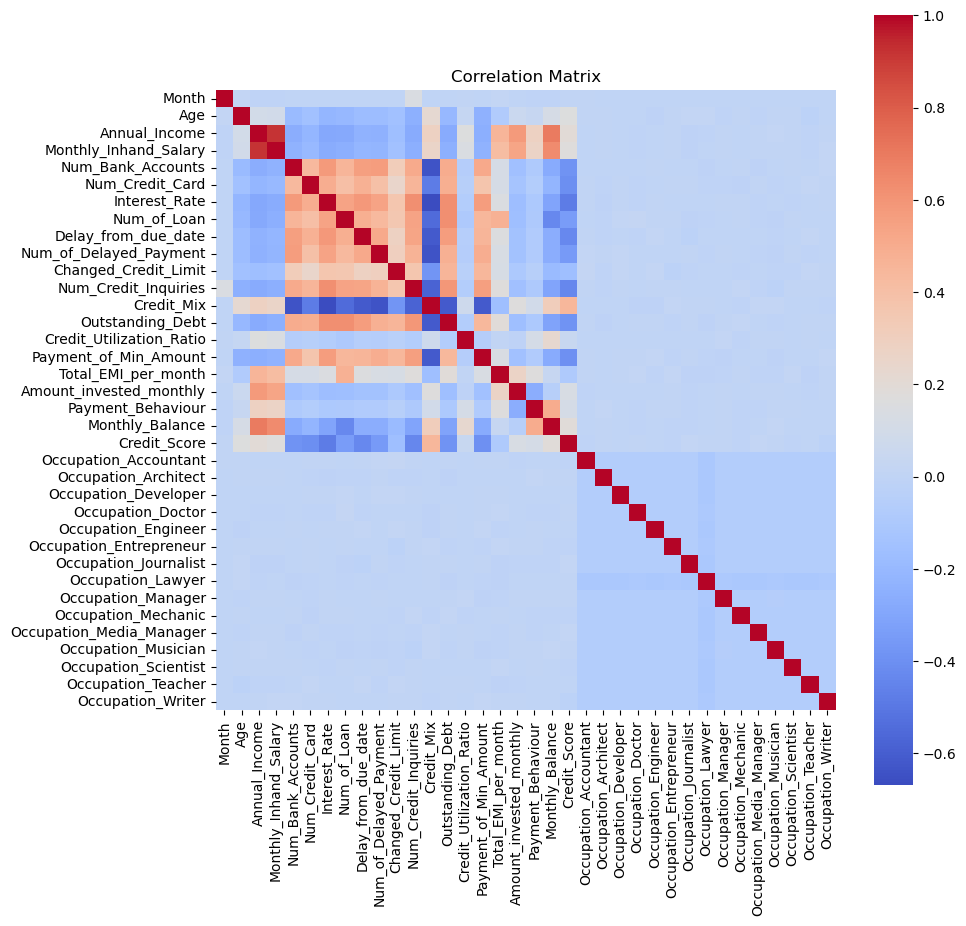

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### Data Splitting

In [37]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [38]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42, stratify=y_val_test)

### Feature Scaling

In [39]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Model

In [40]:
num_features = X_train.shape[1]
num_classes = y_train.nunique()

model = Sequential()

model.add(Dense(256, input_dim=num_features, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,867 (519.01 KB)

 Trainable params: 132,867 (519.01 KB)

 Non-trainable params: 0 (0.00 B)

None


In [41]:
learning_rate = 0.0001
opt = Adam(learning_rate=learning_rate)
patience = 50
num_epochs = 500
batch_size = 256

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, callbacks=[early_stopping], validation_data=(X_val, y_val))

Epoch 1/500
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5213 - loss: 0.9804 - val_accuracy: 0.6565 - val_loss: 0.7886
Epoch 2/500
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6122 - loss: 0.8204 - val_accuracy: 0.6655 - val_loss: 0.7359
Epoch 3/500
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6390 - loss: 0.7763 - val_accuracy: 0.6671 - val_loss: 0.7179
Epoch 4/500
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6495 - loss: 0.7510 - val_accuracy: 0.6720 - val_loss: 0.7040
Epoch 5/500
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6552 - loss: 0.7365 - val_accuracy: 0.6788 - val_loss: 0.6963
Epoch 6/500
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6646 - loss: 0.7260 - val_accuracy: 0.6866 - val_loss: 0.6902
Epoch 7/500
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6699 - loss: 0.7180 - val_accuracy: 0.6909 - val_loss: 0.6847
Epoch 8/500
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6757 - loss: 0.7120 - val_accu

In [42]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

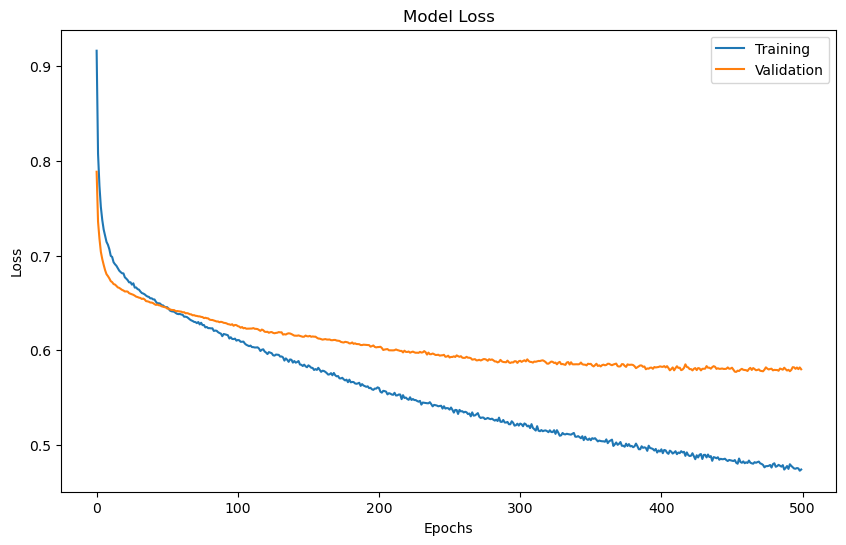

In [43]:
plt.figure(figsize=(10, 6))

sns.lineplot(train_loss, label='Training')
sns.lineplot(val_loss, label='Validation')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

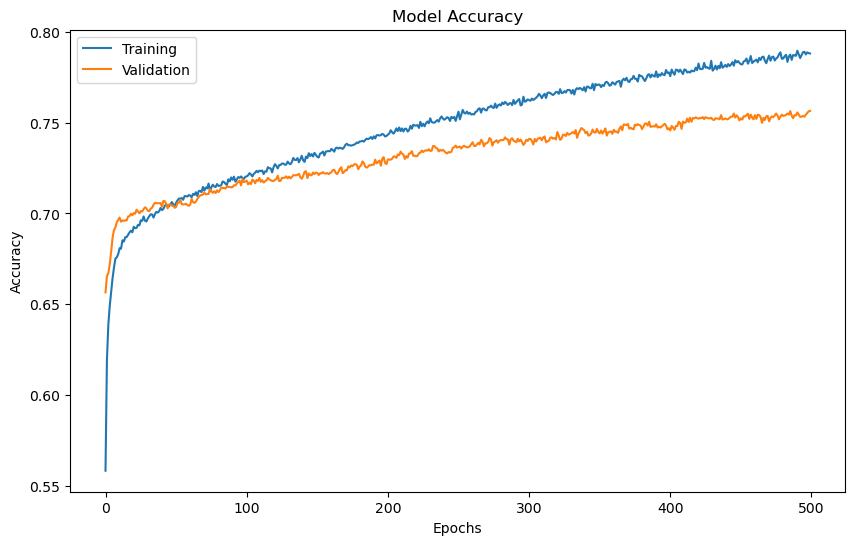

In [44]:
plt.figure(figsize=(10, 6))

sns.lineplot(train_accuracy, label='Training')
sns.lineplot(val_accuracy, label='Validation')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

### Evaluate

In [45]:
y_pred = model.predict(X_test)

255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
y_pred = np.argmax(y_pred, axis=1)

In [47]:
keys = list(credit_score_dict.keys())
vals = list(credit_score_dict.values())

print(classification_report(y_test, y_pred, labels=vals, target_names=keys))

              precision    recall  f1-score   support

        Poor       0.74      0.75      0.75      2406
    Standard       0.78      0.76      0.77      4380
        Good       0.65      0.68      0.67      1369

    accuracy                           0.75      8155
   macro avg       0.73      0.73      0.73      8155
weighted avg       0.75      0.75      0.75      8155



<Figure size 800x800 with 0 Axes>

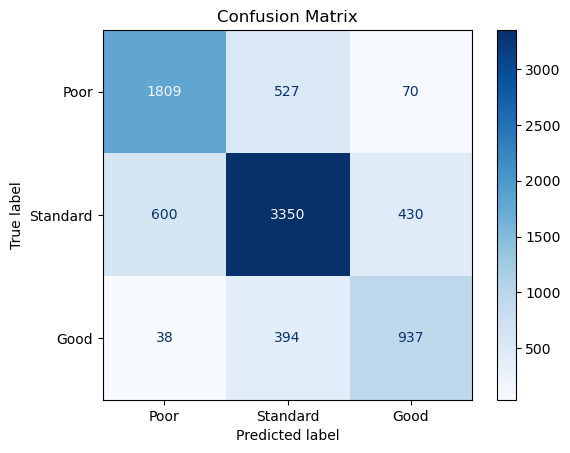

In [48]:
fig = plt.figure(figsize=(8, 8))

cm_model_1 = confusion_matrix(y_test, y_pred)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_model_1, display_labels=['Poor','Standard','Good'])
disp_1.plot(cmap='Blues')
plt.title('Confusion Matrix')

plt.show()